# Keras - taitanic
- reference used : [link](http://melonicedlatte.com/datascience/2019/10/19/140600.html)
- reference used2 : [link](https://pinkwink.kr/1119)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\82102\Anaconda3\envs\chicken\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Read data

In [2]:
# read data
#raw_data = pd.read_excel('titanic.xls')
raw_data = pd.read_csv('train.csv')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# data info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2. Check insufficient data

In [4]:
# check null data
raw_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. Visualization - to check relavant data

#### 3-1) barplot - seaborn, sns

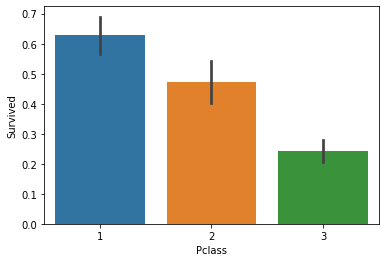

In [5]:
# Passenger Class and Survival relationship plotted
sns.barplot(x="Pclass", y="Survived", data=raw_data)

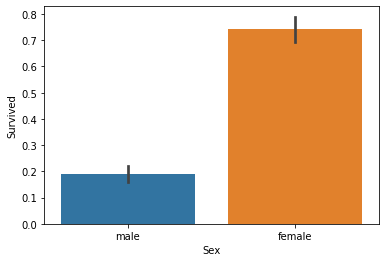

In [6]:
sns.barplot(x='Sex', y='Survived', data=raw_data)

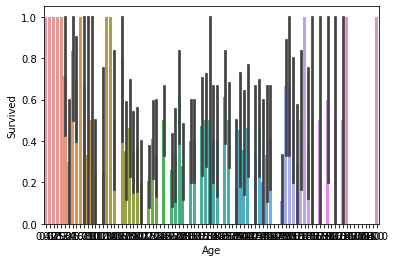

In [7]:
sns.barplot(x='Age', y='Survived', data=raw_data)

### 3-2) barplot - bin

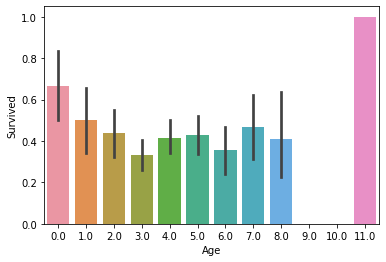

In [8]:
# make bin-ify for the age groups

def make_bins(_d, col, factor=2):
    d = _d.copy()
    rounding = lambda x : np.around(x / factor) # 사용자 함수
    d[col] = d[col].apply(rounding)
    
    return d

round_data = make_bins(raw_data, 'Age', 7.5)
sns.barplot(x="Age", y="Survived", data=round_data)


### 3-4) Seaborn FacetGrid

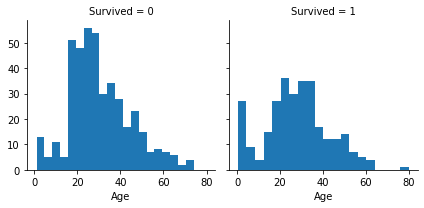

In [9]:
g = sns.FacetGrid(raw_data, col='Survived')
g.map(plt.hist, 'Age', bins=20);

### 3-5) heatmap - seaborn, sns

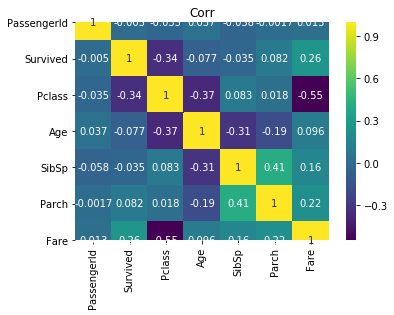

In [10]:
#plt.figure(figsize=(8,8))
plt.figure()

#print(help(sns.heatmap))
sns.heatmap(raw_data.corr(),
               annot=True,
               cmap=plt.cm.viridis,
               square=True
           )
plt.title('Corr')
plt.show()

## 4. Extract additional feature

### 4-1) Extraxt feature

In [11]:
# name column additional feature extraction
raw_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [12]:
raw_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=True)

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [13]:
# raw_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).count()
# column added taged Title from Name column
raw_data['Title'] = raw_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [14]:
print(raw_data['Title'])
raw_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).value_counts()

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Mme           1
Ms            1
Capt          1
Lady          1
Sir           1
Countess      1
Don           1
Jonkheer      1
Name: Name, dtype: int64

### 4-2) Replace values

In [15]:
#replace little meanings to bigger ones
raw_data['Title'] = raw_data['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don',\
                                             'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],\
                                             'Rare')
raw_data['Title'] = raw_data['Title'].replace('Mlle', 'Miss')
raw_data['Title'] = raw_data['Title'].replace('Ms', 'Miss')
raw_data['Title'] = raw_data['Title'].replace('Mme', 'Mrs')
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


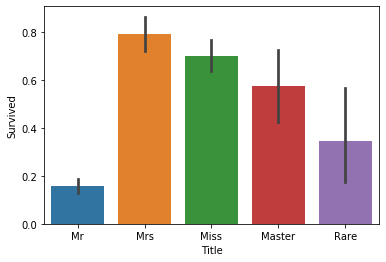

In [16]:
sns.barplot(x='Title', y='Survived', data=raw_data)

### 4-3) clean up - drop unwanted columns

In [17]:
# copy data
filtered_data = raw_data.copy()

# drop unwanted columns
filtered_data.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name',\
        'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)
filtered_data

,Survived,Pclass,Sex,Title
0,0,3,male,Mr
1,1,1,female,Mrs
2,1,3,female,Miss
3,1,1,female,Mrs
4,0,3,male,Mr
...,...,...,...,...
886,0,2,male,Rare
887,1,1,female,Miss
888,0,3,female,Miss
889,1,1,male,Mr


### 4-4) drop Nan values

In [18]:
print(filtered_data.count())

Survived    891
Pclass      891
Sex         891
Title       891
dtype: int64


In [19]:
filtered_data.dropna(how='any', inplace=True)
print(filtered_data.count())
print(filtered_data.isnull())
print(f'null data count :  {filtered_data.isnull().count()}')
filtered_data

Survived    891
Pclass      891
Sex         891
Title       891
dtype: int64
     Survived  Pclass    Sex  Title
0       False   False  False  False
1       False   False  False  False
2       False   False  False  False
3       False   False  False  False
4       False   False  False  False
..        ...     ...    ...    ...
886     False   False  False  False
887     False   False  False  False
888     False   False  False  False
889     False   False  False  False
890     False   False  False  False

[891 rows x 4 columns]
null data count :  Survived    891
Pclass      891
Sex         891
Title       891
dtype: int64


,Survived,Pclass,Sex,Title
0,0,3,male,Mr
1,1,1,female,Mrs
2,1,3,female,Miss
3,1,1,female,Mrs
4,0,3,male,Mr
...,...,...,...,...
886,0,2,male,Rare
887,1,1,female,Miss
888,0,3,female,Miss
889,1,1,male,Mr


### 4-3) Convert Strings to numeric

#### 4-3-1) male/female

In [20]:
tmp, filtered_data['Sex'] = np.unique(filtered_data['Sex'], return_inverse=True)

In [21]:
tmp

array(['female', 'male'], dtype=object)

In [22]:
filtered_data

,Survived,Pclass,Sex,Title
0,0,3,1,Mr
1,1,1,0,Mrs
2,1,3,0,Miss
3,1,1,0,Mrs
4,0,3,1,Mr
...,...,...,...,...
886,0,2,1,Rare
887,1,1,0,Miss
888,0,3,0,Miss
889,1,1,1,Mr


#### 4-3-2) Title

In [23]:
_, filtered_data['Title'] = np.unique(filtered_data['Title'], return_inverse=True)

In [24]:
filtered_data

,Survived,Pclass,Sex,Title
0,0,3,1,2
1,1,1,0,3
2,1,3,0,1
3,1,1,0,3
4,0,3,1,2
...,...,...,...,...
886,0,2,1,4
887,1,1,0,1
888,0,3,0,1
889,1,1,1,2


### 4-4) make training Set

In [25]:
# split train / test data if is in single DF
"""
from sklearn.model_selection import train_test_split
train, test = train_test_split(raw_data, test_size=0.2)
"""
train_data = filtered_data['Survived']
train_data

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [26]:
filtered_data.drop(['Survived'], inplace=True, axis=1)
filtered_data

,Pclass,Sex,Title
0,3,1,2
1,1,0,3
2,3,0,1
3,1,0,3
4,3,1,2
...,...,...,...
886,2,1,4
887,1,0,1
888,3,0,1
889,1,1,2


### 5. Prepare - Keras Model

#### 5-1) imports in keras

In [27]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [28]:
model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#### 5-2) compile the model

In [29]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### 5-3) train the model

In [30]:
hist = model.fit(filtered_data, train_data, epochs=50, batch_size=1, verbose=1)




Epoch 1/50





891/891 [==============================] - 3s 4ms/step - loss: 0.6341 - acc: 0.6162
Epoch 2/50
891/891 [==============================] - 2s 2ms/step - loss: 0.5632 - acc: 0.7003
Epoch 3/50
891/891 [==============================] - 2s 2ms/step - loss: 0.5238 - acc: 0.7811
Epoch 4/50
891/891 [==============================] - 2s 2ms/step - loss: 0.5076 - acc: 0.7778
Epoch 5/50
891/891 [==============================] - 2s 2ms/step - loss: 0.4969 - acc: 0.7879
Epoch 6/50
891/891 [==============================] - 2s 2ms/step - loss: 0.4883 - acc: 0.7901
Epoch 7/50
891/891 [==============================] - 2s 2ms/step - loss: 0.4826 - acc: 0.7946
Epoch 8/50
891/891 [==============================] - 2s 2ms/step - loss: 0.4752 - acc: 0.7969
Epoch 9/50
891/891 [==============================] - 2s 2ms/step - loss: 0.4695 - acc: 0.7924
Epoch 10/50
891/891 [==============================] - 2s 2ms/step - loss: 0.4662 - acc: 0.7924
Epoch 11/50
891/891 [====================

KeyError: 'val_loss'

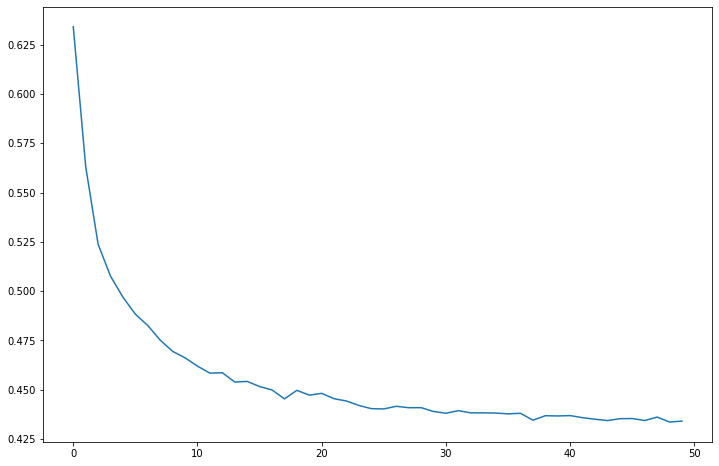

In [31]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.show()

In [ ]:
#### 5-4) load test data
test_set = pd.read_csv('test.csv')
test_set

In [ ]:
test_set['Title'] = test_set.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_set['Title'] = test_set['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don',\
                                             'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],\
                                             'Rare')
test_set['Title'] = test_set['Title'].replace('Mlle', 'Miss')
test_set['Title'] = test_set['Title'].replace('Ms', 'Miss')
test_set['Title'] = test_set['Title'].replace('Mme', 'Mrs')

test_set.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name',\
        'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)
test_set


In [ ]:
_, test_set['Sex'] = np.unique(test_set.Sex, return_inverse=True)
_, test_set['Title'] = np.unique(test_set.Title, return_inverse=True)
test_set

In [ ]:
predictions = model.predict(test_set)
predictions

In [ ]:
predictions_class = model.predict_classes(test_set)
predictions_class